# K-Means Clustering Algorithm 이란?

일반적으로 군집(clustering)의 목적은 비슷한 데이터끼리 묶어서 새로운 패턴이나 인사이트를 발견하는 것 입니다.  
clustering 알고리즘은 비지도 학습(Unsupervised learning) 방식이기 때문에 데이터 추가적인 label이나 정보가 필요 없습니다.  
  
오로지 데이터만 주어진 상태에서 비슷한 데이터를 하나의 클러스터로 묶기 위해서 다양한 방법들이 제시되었습니다.  
주어진 데이터가 얼마나 뭉쳐있는지를 기준으로 묶을 수 있고, 각 데이터가 얼마나 떨어져 있는지를 계산하여 가까운 데이터끼리 하나의 군집으로 묶을 수도 있으며, 데이터의 분포를 기준으로 비슷한 분포를 따르는 데이터끼리 묶는 방법 등을 생각해 볼 수 있습니다.  

이번에 소개하는 K-means는 이러한 방법들 중 데이터 포인트끼리 얼마나 가까운지를 기준으로 묶는 알고리즘 입니다.

## K-Means Clustering Algorithm : Pseudo Code

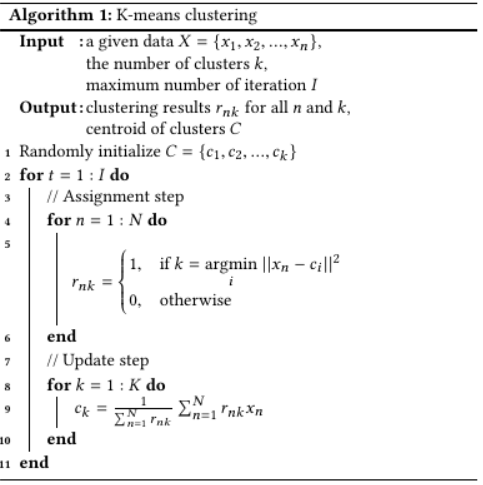

위 그림은 K-means clustering algorithm의 pseudo code입니다.

우선 입력값을 살펴보면,k-means 알고리즘의 입력값은 총 3개가 필요합니다.
1. 데이터 (X)
2. cluster의 갯수 (K)
3. 최대 반복 횟수 (I)

위 데이터를 입력하면 출력값으로 모든 데이터에 대해 입력한 클러스터의 갯수만큼 군집을 출력합니다.

## **알고리즘의 작동방식**
pseudo code의 진행 방식을 살펴보면 다음과 같습니다.  

1. 랜덤하게 k개의 수만큼의 Centroid를 생성한다.
2. 생성된 Centroid와 모든 데이터와의 거리를 잰다.
3. 가장 가까운 Cluster에 대해 r_nk를 1로 할당하며, 그렇지 않은 클러스터에 대해서는 0을 할당한다
4. Centroid를 업데이트 한다.(r_nk * x_n을 이용 -> 가장 가까운 클러스터에 대해서만 평균을 계산)
5. 위 과정을 I번 반복

우선 이 알고리즘은 사람이 직접 몇개의 군집을 만들지 결정해야 합니다.  
군집의 갯수를 정하게 되면, 그 갯수만큼 random하게 centroid(cluster의 중심)을 초기화 하게 됩니다.  

# Python을 이용한 구현

K-means를 구현하는 방법은 scikit learn등에서 제공하는 클래스로 구현이 가능하지만, 이러한 완성된 라이브러리를 사용하지 않고 구현해보는 것도 좋다고 생각합니다.  
우선, scikit-learn을 이용하여 구현한 뒤, 완성된 라이브러리를 사용하지 않고 직접 K-means를 구현해보았습니다.

우선 모델을 구현해본 뒤, 실제로 데이터를 이용하여 KMeans를 수행해보겠습니다.

## 1.Scikit-learn을 이용한 구현

scikit learn을 이용하면 매우 간단하게 구현할 수 있습니다.

In [15]:
from sklearn.cluster import KMeans

In [16]:
sci_model = KMeans(n_clusters = 4,max_iter = 10)

## 2. Scikit-learn을 사용하지 않는 구현

In [17]:
from collections import defaultdict

class K_Means():
    
    #Init
    def __init__(self,k,max_iter = 100):
        #cluster의 갯수 (K)
        self.k = k
        #최대 반복횟수(I)
        self.max_iter = max_iter
        #centroid가 iter에 따라 어떻게 변화하는지 나타내기 위해 값을 저장합니다.
        self.save_centroid_history = list() 
        
    #Save history
    def get_save_centroid_history(self):
        return self.save_centroid_history
    
    #Centroid의 초기값을 random하게 설정
    def init_Centroid(self,data):
        xy_max = np.max(data,axis = 0)
        xy_min = np.min(data,axis = 0)
        Centroids = list()
        for num in range(self.k):
            x = random.randint(int(xy_min[0]),int(xy_max[0]))
            y = random.randint(int(xy_min[1]),int(xy_max[1]))
            Centroids.append([x,y])
        return Centroids
    
    #calculate distance : 어떤 두 점이 주어지면 두 점사이의 거리를 측정합니다(Euclidean distance 이용)
    def get_dist(self,x1,y1,x2,y2):
        dist = ((x2-x1)**2 + (y2-y1)**2)**0.5
        return dist
    
    #make Cluster : K개의 centroid 마다 모든 데이터와의 거리를 측정한 뒤, 가장 가까운 점을 해당 centroid의 군집으로 설정합니다.
    def Create_Cluster(self,Centroids,data):
        group = defaultdict(list)
        for point in data:
            distance = list()
            for Center in Centroids:
                dist = self.get_dist(point[0],point[1],Center[0],Center[1])
                distance.append(dist)
                cluster_num = np.argmin(distance)
                
            group[cluster_num].append(list([point[0],point[1]]))
            
        return group
    
    #각 그룹별로 Centroid를 Update함.
    def update_Centroid(self,cluster_group):
        Centroids = list()
        for group_num in range(self.k):
            cluster_point = np.array(cluster_group[group_num])
            new_Centroid = np.mean(cluster_point, axis = 0)
            self.save_centroid_history.append(list(new_Centroid))
            Centroids.append(new_Centroid)
        return Centroids
    
    #Centroid와 점사이의 거리가 멀어서 Cluster에 단 한개의 데이터도 할당이 안되는 경우가 존재하면 True를 return 함
    def check_nan(self,cluster_group):
        for group in range(self.k):
            if not cluster_group[group]:
                return True
        else:
            return False
            
    #데이터가 입력되면, 입력된 데이터를 기반으로 k-means clustering 수행
    def fit(self,data):
        
        centroid = self.init_Centroid(data)
        for loop in range(self.max_iter): 
            
            cluster_group = self.Create_Cluster(centroid,data)
            
            if self.check_nan(cluster_group):
                centroid = self.init_Centroid(data)
                continue
            centroid = self.update_Centroid(cluster_group)
        return cluster_group

In [18]:
def draw_graph(result,save_data,num_cluster):
    y = list()
    data = list()
    for i in range(num_cluster):
        data.extend(result[i])
        for j in range(len(result[i])):
            y.append(i)
    
    data = np.array(data)
    y = np.array(y)
    rgb = np.array(["r","g","b",'y'])
    plt.scatter(data[:,0],data[:,1],color = rgb[y],s = 20)
    plt.scatter(np.array(save_data)[:,0],np.array(save_data)[:,1],color = 'black',s = 10)

# 가상 데이터를 만들어서 확인해보기

In [19]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import random

# 가상 데이터 1 : make_blobs

sklearn에서 제공하는 가상 데이터를 제공해주는 함수인 make_blobs를 이용하여 결과를 살펴보도록 하겠습니다.  
make_blobs는 정규분포를 이용하여 데이터를 생성해주며, 데이터 모양은 아래 그림과 같습니다.

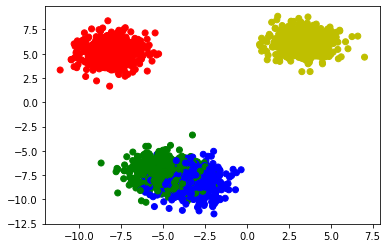

In [20]:
#데이터 생성
X,y = make_blobs(2000,centers = 4,random_state = 19)
#데이터 시각화
rgb = np.array(["r","g","b",'y'])
plt.scatter(X[:,0],X[:,1],color = rgb[y])

## make_blobs : Scikit learn을 이용한 K-means clustering

In [21]:
sci_model.fit(X)
#cluster의 center 구하기
sci_cluster_center = [list(i) for i in sci_model.cluster_centers_]
#draw_graph 인풋값 형식 맞춰주기
sci_group = defaultdict(list)
for idx,i in enumerate(sci_model.labels_):
    sci_group[i].append(X[idx])

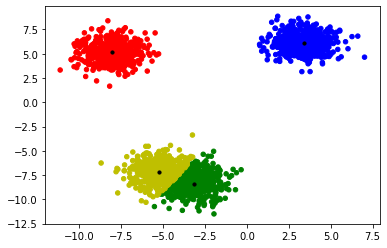

In [22]:
draw_graph(sci_group,sci_cluster_center,4)

## make_blobs : 직접 만든 K-means clustering

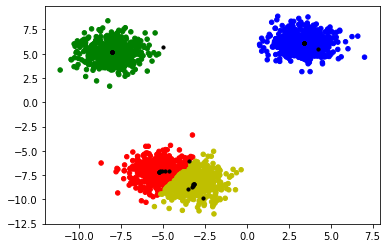

In [23]:
num_cluster = 4
k_means = K_Means(k = num_cluster,max_iter = 10)
result = k_means.fit(X)
save_data = k_means.get_save_centroid_history()
draw_graph(result,save_data,num_cluster = num_cluster)

# 가상 데이터 2 : make_moons

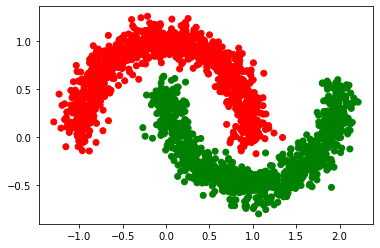

In [24]:
X1,y1 = make_moons(2000,noise = 0.1)
rgb = np.array(["r","g","b"])
plt.scatter(X1[:,0],X1[:,1],color = rgb[y1])

## make_moons : Scikit learn을 이용한 K-means clustering

In [25]:
sci_model2 = KMeans(n_clusters = 2,max_iter = 10)

In [26]:
sci_model2.fit(X1)
#cluster의 center 구하기
sci_cluster_center2 = [list(i) for i in sci_model2.cluster_centers_]
#draw_graph 인풋값 형식 맞춰주기
sci_group2 = defaultdict(list)
for idx,i in enumerate(sci_model2.labels_):
    sci_group2[i].append(X1[idx])

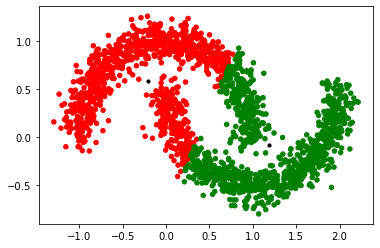

In [27]:
draw_graph(sci_group2, sci_cluster_center2, num_cluster = 4)

## make_moons : 직접 만든 K-means clustering

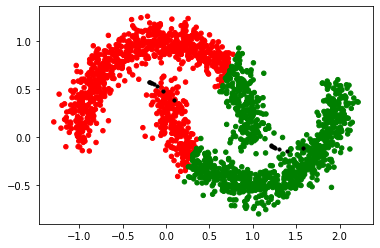

In [28]:
num_cluster = 2
k_means = K_Means(k = num_cluster,max_iter = 10)
result = k_means.fit(X1)
save_data = k_means.get_save_centroid_history()
draw_graph(result,save_data,num_cluster = num_cluster)

위 결과를 살펴보면, K-means clustering 알고리즘은 거리 기준으로 가까운 데이터를 비슷한 데이터로 판단하므로, 원 데이터의 패턴이 어떤지 상관없이 같은 clsuter로 분류하기 때문에, 특정한 패턴이 있는 데이터에 대해서는 군집 성능이 떨어진다고 볼 수 있다.

make_moons로 만든 함수처럼, 특정 패턴이 있는 데이터의 경우에는 DBSCAN 같은 **밀도(density) 기반의 clustering 방법**이 효과가 좋을 수 있다.

마지막으로, K-means 알고리즘의 장단점을 정리하면 다음과 같습니다.

#### **장점**
1. 구현이 간단하다.
2. 새로운 데이터가 입력되는 경우, 어느 클러스터에 속하는 지 금방 계산할 수 있다(계산량이 적다)

#### **단점**
1. 사람이 직접 cluster의 갯수를 정해주어야 하기 때문에, 최적의 클러스터 갯수를 바로 파악하기 쉽지 않다.
2. 특정 패턴을 갖는 데이터의 경우 성능이 떨어질 수 있다.
3. 단순히 거리를 기반으로 클러스터를 결정하므로 결과해석력이 떨어진다.

#### **여담**
각 데이터 포인트끼리 거리를 잴 때, euclidean distance가 아닌 cosine similarity를 이용하면 어떨까?